In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [110]:
from sklearn.datasets import make_classification
x,y= make_classification(n_samples=100,n_features=2,n_informative=1,
    n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,
            hypercube=False,class_sep=20)

In [111]:
import matplotlib.pyplot as plt

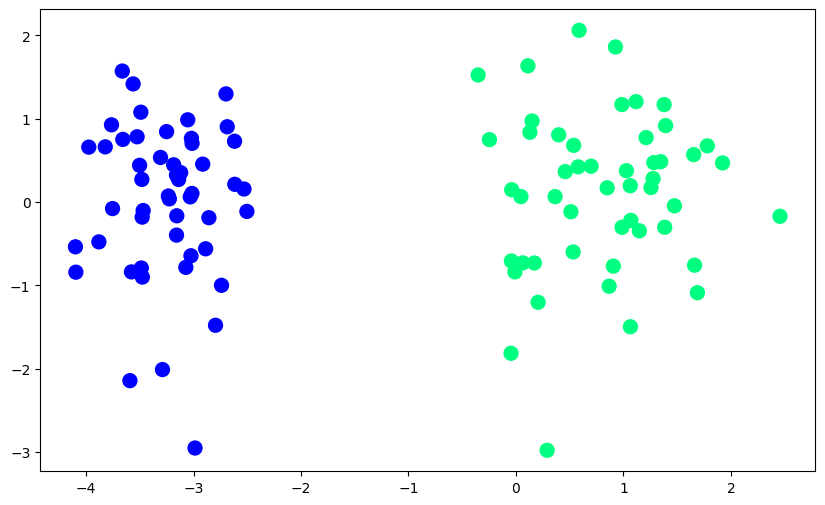

In [112]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [113]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [114]:
print(lor.coef_)
print(lor.intercept_)

[[4.79907948 0.21219864]]
[5.77315245]


In [115]:
m1 = -(lor.coef_[0][0]/lor.coef_[0][1])
b1 = -(lor.intercept_/lor.coef_[0][1])

In [116]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [117]:
def gd(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.5
    for i in range(6000):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights + lr*(np.dot((y-y_hat),x)/x.shape[0])

    return weights[1:],weights[0]
        

In [118]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [119]:
coef_,intercept_ = gd(x,y)

In [120]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [121]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

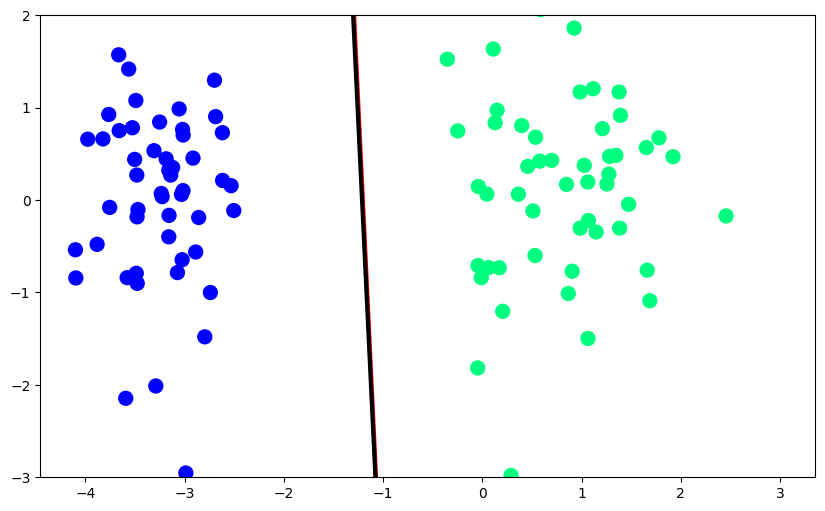

In [122]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)